<a href="https://colab.research.google.com/github/mickey2798/Cars24_Assignment---Predicting-Engine-Rating/blob/master/Cars24_Assignment_Predicting_Engine_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
 

## Loading the Data

In [ ]:
xls = pd.ExcelFile("data.xlsx")
df = pd.read_excel(xls, 'data')

In [ ]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,S

In [ ]:
# Checking the shape of the given Data => We have total 26307 rows and 73 features.
df.shape

(26307, 73)

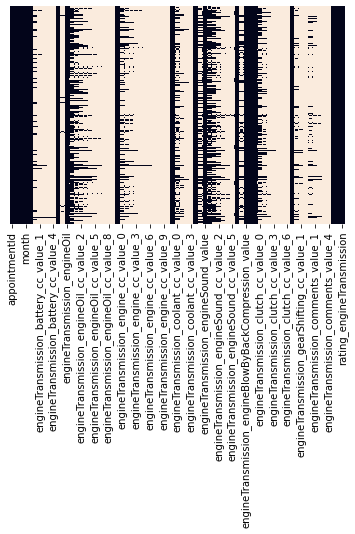

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
##Checking how many nulls do we have in our DataSet.
nulls = df.isnull().sum(axis=0).to_frame()
for index, row in nulls.iterrows():
  print(f"{index} : {row[0]}")


appointmentId : 0
inspectionStartTime : 0
year : 0
month : 0
engineTransmission_battery_value : 0
engineTransmission_battery_cc_value_0 : 22869
engineTransmission_battery_cc_value_1 : 25877
engineTransmission_battery_cc_value_2 : 26235
engineTransmission_battery_cc_value_3 : 26291
engineTransmission_battery_cc_value_4 : 26303
engineTransmission_engineoilLevelDipstick_value : 0
engineTransmission_engineOilLevelDipstick_cc_value_0 : 25896
engineTransmission_engineOil : 0
engineTransmission_engineOil_cc_value_0 : 7750
engineTransmission_engineOil_cc_value_1 : 15303
engineTransmission_engineOil_cc_value_2 : 19714
engineTransmission_engineOil_cc_value_3 : 22565
engineTransmission_engineOil_cc_value_4 : 24535
engineTransmission_engineOil_cc_value_5 : 25698
engineTransmission_engineOil_cc_value_6 : 26186
engineTransmission_engineOil_cc_value_7 : 26296
engineTransmission_engineOil_cc_value_8 : 26305
engineTransmission_engineOil_cc_value_9 : 26307
engineTransmission_engine_value : 0
engineTrans

## So after checking, we get to know that our dataset has a lot of missing values. So we drop those columns/ features with more than 50% missing values

In [ ]:
count_half = len(df)/2

In [ ]:
df = df.dropna(thresh=count_half,axis=1)

In [ ]:
##Checking how many nulls do we have in our DataSet.
nulls = df.isnull().sum(axis=0).to_frame()
for index, row in nulls.iterrows():
  print(f"{index} : {row[0]}")

appointmentId : 0
inspectionStartTime : 0
year : 0
month : 0
engineTransmission_battery_value : 0
engineTransmission_engineoilLevelDipstick_value : 0
engineTransmission_engineOil : 0
engineTransmission_engineOil_cc_value_0 : 7750
engineTransmission_engine_value : 0
engineTransmission_coolant_value : 0
engineTransmission_engineMounting_value : 0
engineTransmission_engineSound_value : 0
engineTransmission_engineSound_cc_value_0 : 7227
engineTransmission_engineSound_cc_value_1 : 12802
engineTransmission_exhaustSmoke_value : 0
engineTransmission_engineBlowByBackCompression_value : 0
engineTransmission_engineBlowByBackCompression_cc_value_0 : 0
engineTransmission_clutch_value : 0
engineTransmission_gearShifting_value : 0
fuel_type : 0
odometer_reading : 0
rating_engineTransmission : 0


## We have 3 features still left with missing data with one approx 50% missing data. So we will drop one feature with approx 50% missing data and fill rest 2 columns data

In [ ]:
df.shape

(26307, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              26307 non-null  object        
 1   inspectionStartTime                                        26307 non-null  datetime64[ns]
 2   year                                                       26307 non-null  int64         
 3   month                                                      26307 non-null  int64         
 4   engineTransmission_battery_value                           26307 non-null  object        
 5   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object        
 6   engineTransmission_engineOil                               26307 non-null  object        
 7   engineTransmission_engineOil_cc

In [ ]:
##Filing the missing values 
df['engineTransmission_engineOil_cc_value_0']=df['engineTransmission_engineOil_cc_value_0']\
.fillna(df['engineTransmission_engineOil_cc_value_0'].mode()[0])

In [ ]:
df['engineTransmission_engineSound_cc_value_0']=df['engineTransmission_engineSound_cc_value_0']\
.fillna(df['engineTransmission_engineSound_cc_value_0'].mode()[0])


In [ ]:
df['engineTransmission_engineOil_cc_value_0'].head(10)

0      Leaking
1      Leaking
2        Dirty
3        Dirty
4      Leaking
5      Leaking
6        Dirty
7      Leaking
8    Level Low
9        Dirty
Name: engineTransmission_engineOil_cc_value_0, dtype: object

In [ ]:
df['engineTransmission_engineSound_cc_value_0'].head(10)

0    Alternator Brg Noise
1            Timing Noise
2    Alternator Brg Noise
3            Timing Noise
4            Timing Noise
5            Tappet Noise
6            Timing Noise
7            Timing Noise
8    Alternator Brg Noise
9            Timing Noise
Name: engineTransmission_engineSound_cc_value_0, dtype: object

In [ ]:
## Droping this particular feature because it has missing values greater than 50%.
df.drop(['engineTransmission_engineSound_cc_value_1'],axis=1,inplace=True)

In [ ]:
#Final Shape of our Data => Removed 52 features.
df.shape

(26307, 21)

In [ ]:
##Checking how many nulls do we have in our DataSet.
nulls = df.isnull().sum(axis=0).to_frame()
for index, row in nulls.iterrows():
  print(f"{index} : {row[0]}")

appointmentId : 0
inspectionStartTime : 0
year : 0
month : 0
engineTransmission_battery_value : 0
engineTransmission_engineoilLevelDipstick_value : 0
engineTransmission_engineOil : 0
engineTransmission_engineOil_cc_value_0 : 0
engineTransmission_engine_value : 0
engineTransmission_coolant_value : 0
engineTransmission_engineMounting_value : 0
engineTransmission_engineSound_value : 0
engineTransmission_engineSound_cc_value_0 : 0
engineTransmission_exhaustSmoke_value : 0
engineTransmission_engineBlowByBackCompression_value : 0
engineTransmission_engineBlowByBackCompression_cc_value_0 : 0
engineTransmission_clutch_value : 0
engineTransmission_gearShifting_value : 0
fuel_type : 0
odometer_reading : 0
rating_engineTransmission : 0


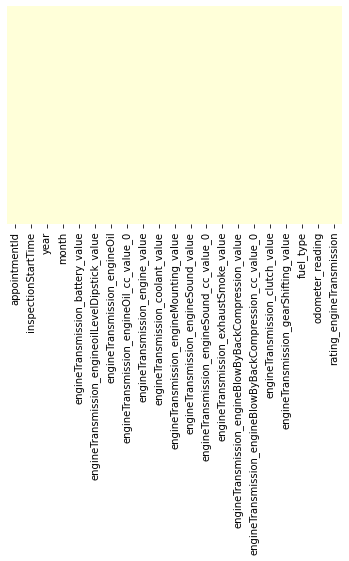

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

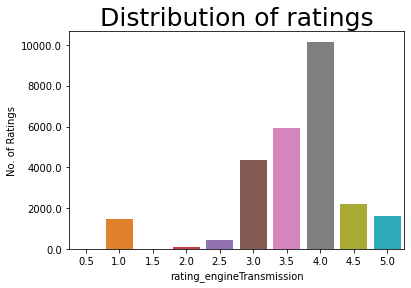

In [ ]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings', fontsize=25)
sns.countplot(df.rating_engineTransmission)
ax.set_yticklabels([item for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings')

plt.show()

Clearly, we can see that there is a huge ratings imbalance problem

## Handling Categorical features

In [ ]:
columns=['engineTransmission_battery_value','engineTransmission_engineoilLevelDipstick_value',
         'engineTransmission_engineOil','engineTransmission_engineOil_cc_value_0','engineTransmission_engine_value',
         'engineTransmission_coolant_value','engineTransmission_engineMounting_value','engineTransmission_engineSound_value',
         'engineTransmission_engineSound_cc_value_0','engineTransmission_exhaustSmoke_value',
         'engineTransmission_engineBlowByBackCompression_value','engineTransmission_engineBlowByBackCompression_cc_value_0',
         'engineTransmission_clutch_value','engineTransmission_gearShifting_value','fuel_type']

In [ ]:
len(columns)

15

In [ ]:
def one_hot_multicols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
final_df = df

In [ ]:
final_df = one_hot_multicols(columns)

engineTransmission_battery_value
engineTransmission_engineoilLevelDipstick_value
engineTransmission_engineOil
engineTransmission_engineOil_cc_value_0
engineTransmission_engine_value
engineTransmission_coolant_value
engineTransmission_engineMounting_value
engineTransmission_engineSound_value
engineTransmission_engineSound_cc_value_0
engineTransmission_exhaustSmoke_value
engineTransmission_engineBlowByBackCompression_value
engineTransmission_engineBlowByBackCompression_cc_value_0
engineTransmission_clutch_value
engineTransmission_gearShifting_value
fuel_type


In [ ]:
final_df.shape

(26307, 40)

In [ ]:
## Removing the duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

(26307, 30)

In [ ]:
final_df.head()

,appointmentId,inspectionStartTime,year,month,odometer_reading,rating_engineTransmission,Yes,Leakage from Side cover,Leakage from Sump/chamber,Leakage from Tappet Cover,Leakage from Turbo Charger,Leaking,Level Low,Low Pressure warning light glowing,Mixed with Coolant,Engine Auxiliary Noise,Injector Noise,Tappet Noise,Timing Noise,Water Pump Brg Noise,Whistling Noise-Turbo,NO Blow-by,Oil spillage on Idle,Perm. Blow By on idle,Perm. blow by & oil spillage on idle,Electric,Hybrid,Petrol,Petrol + CNG,Petrol + LPG
0,aj_01,2019-02-03 15:43:48,2008,8,124600,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,aj_02,2019-01-16 13:02:12,2007,5,78108,4.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,aj_03,2019-02-09 13:31:04,2012,5,93348,3.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,aj_04,2019-01-18 11:02:53,2013,1,48233,3.5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,aj_05,2019-01-27 12:12:06,2011,7,74368,4.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
final_df=final_df.drop(['appointmentId'],axis=1)

In [ ]:
X=final_df.drop(['rating_engineTransmission'], axis=1)
X=final_df.drop(['inspectionStartTime'], axis=1)
X.head()

,year,month,odometer_reading,rating_engineTransmission,Yes,Leakage from Side cover,Leakage from Sump/chamber,Leakage from Tappet Cover,Leakage from Turbo Charger,Leaking,Level Low,Low Pressure warning light glowing,Mixed with Coolant,Engine Auxiliary Noise,Injector Noise,Tappet Noise,Timing Noise,Water Pump Brg Noise,Whistling Noise-Turbo,NO Blow-by,Oil spillage on Idle,Perm. Blow By on idle,Perm. blow by & oil spillage on idle,Electric,Hybrid,Petrol,Petrol + CNG,Petrol + LPG
0,2008,8,124600,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2007,5,78108,4.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,2012,5,93348,3.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2013,1,48233,3.5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,2011,7,74368,4.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
Y=final_df.rating_engineTransmission
Y.head()

0    3.0
1    4.0
2    3.5
3    3.5
4    4.0
Name: rating_engineTransmission, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:

print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (18414, 28)
Number of data points in test data : (7893, 28)


In [ ]:
print("Number of data points in train data :",Y_train.shape)
print("Number of data points in test data :",Y_test.shape)
Y_train.head()


Number of data points in train data : (18414,)
Number of data points in test data : (7893,)


13995    4.0
261      3.5
14459    4.0
4192     4.0
4548     3.5
Name: rating_engineTransmission, dtype: float64

In [ ]:
X_test.shape

(7893, 28)

In [ ]:
X_test.head()

,year,month,odometer_reading,rating_engineTransmission,Yes,Leakage from Side cover,Leakage from Sump/chamber,Leakage from Tappet Cover,Leakage from Turbo Charger,Leaking,Level Low,Low Pressure warning light glowing,Mixed with Coolant,Engine Auxiliary Noise,Injector Noise,Tappet Noise,Timing Noise,Water Pump Brg Noise,Whistling Noise-Turbo,NO Blow-by,Oil spillage on Idle,Perm. Blow By on idle,Perm. blow by & oil spillage on idle,Electric,Hybrid,Petrol,Petrol + CNG,Petrol + LPG
3739,2017,10,47131,5.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
23531,2005,7,176533,3.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
13838,2013,6,48433,3.5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
10108,2014,3,45784,3.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
7125,2006,7,156814,3.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_test.drop(['rating_engineTransmission'],axis=1).head()

,year,month,odometer_reading,Yes,Leakage from Side cover,Leakage from Sump/chamber,Leakage from Tappet Cover,Leakage from Turbo Charger,Leaking,Level Low,Low Pressure warning light glowing,Mixed with Coolant,Engine Auxiliary Noise,Injector Noise,Tappet Noise,Timing Noise,Water Pump Brg Noise,Whistling Noise-Turbo,NO Blow-by,Oil spillage on Idle,Perm. Blow By on idle,Perm. blow by & oil spillage on idle,Electric,Hybrid,Petrol,Petrol + CNG,Petrol + LPG
3739,2017,10,47131,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
23531,2005,7,176533,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
13838,2013,6,48433,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
10108,2014,3,45784,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
7125,2006,7,156814,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
Y_test = Y_test.to_numpy()

In [ ]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
lgb = LGBMRegressor(random_state=42, objective='regression')
svr = SVR()

In [ ]:
ensemble_regressor = VotingRegressor(
    [('lr', lr), ('rf', rf), ('lgb', lgb), ('svr', svr)])

In [ ]:
for reg in (lr, rf, lgb, svr, ensemble_regressor):
    reg.fit(X_train, Y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__, mean_squared_error(Y_test, y_pred))

LinearRegression 3.635376481250359e-30
RandomForestRegressor 3.212340048143925e-05
LGBMRegressor 3.168709852152263e-05
SVR 0.613362359285991
VotingRegressor 0.03839576672711098


Please answer the following:

1.Briefly describe your approach to this problem and the steps you took

    I. By analysing the data, we get to know Dataset has number of missing values. 
    II. Did  Data pre-processing by handling  missing values and then worked on categorical data using one –hot encoding technique
    III. Used Various Machine learning models for training and testing  data, starting from basics to ensembling. 
    IV.  Got a reasonable MSE score on SVR and on ensemble Regressor.


2.            Basics:

 a. How well does your model work?


    • My model worked well with the ensemble regressor, as it combine the decisions from multiple models 
    to improve the overall performance. 

b.How do you know for sure that’s how well it works?

    • This model works well for sure because when we calculated mean_squared_error for our model(ensemble regressor), 
    it came out to be 0.0383 which is much better i.e, our error is quite low.

c.What stats did you use to prove its predictive performance and why?

    • As our model, Predicting Engine Rating , is a regression problem, we use mean squared error. 
    Since the errors are squared before they are averaged in MSE, it gives a relatively high weight to large errors. 
    This means the MSE should be more useful when large errors are particularly undesirable.
d.What issues did you encounter?

    • Lots of missing values are there which needed to be handled  for best fit model
    • Handled categorical data using One- hot encoding for multivariable
    • Highly imbalanced data

e.What insights did you obtain from this data? For example: What features are important? Why? What visualizations help you understand the data?

    • As we have to handle lot of missing values here, we have to choose features that have enough data to train our model better
    • Using heatmap visualization, we get to know about features/columns that have lots of missing values . So we removed those features with more than 50% missing values
    • By visualizing ratings-plots, we came to know that our data is highly imbalanced. So we can’t use Accuracy as our performance metric
    

3.Next steps:

a.What other data (if any) would have been useful?

    • There could have been numerous data about the wear and tear of the engine which could have been used but also numerical data 
    like the life of the engine and fuel type related life is also detectable as 
    diesel engines have a lesser life than petrol engines, number of accidents, number of services etc. 
    Some of these variable could have acted as constraints or good predictors 
    but with a good and strong correlation for determining the output.

b.What are some other things you would have done if you had more time?

    • I would have used more time to identify more anomalies in data and specifically used that time to build a good model 
    for the data as it took me a little more than usual time to determine the best 
    possible methods to find the prediction model.

    • I would have dealt with the ratings imbalance Problem. Generally, Whenever this problem arises in 
    classification problem I use a technique known as SMOTE(Synthetic Minority Oversampling Technique). 
    As this is a Regression problem, We can use 
    SMOGN(Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise).
 